<h1>
Book Classification</h1>
<p>
    Golnaz Abrishami and Ada Niu<br>
    Professor Dana Nehoran<br>
    October 2018<br><p>

## Why Book Clustring ?

- There exists great interest in books due to their important role in people's leisure.
- Reality case is, many movies are decided to be filmed or not lie on ratings of books since books generally established before movies. Users' taste or ratings on books can give movies industry some insights. Our project can also be valuable for book related organizations or stores, such as library and bookstores. When we chose this datasets, we felt that our work will be beneficial to certain groups.
- This book data was a real-life datasets. Ratings were found and collected from the internet.
- This book data was selected because it had overall complete information about books and a large data size (a total of 980k ratings, for 10,000 books, from 53,424 users, and corresponding book information such as title, author,etc.) we could work with. All users have made at least two ratings.

## Objective

Our project will hopefully show ways in which county library members can share their interested books to members who have similar taste of books, in a way of enhancing communication and reading culture. <br>

The county library also welcome new users who wants to register for membership. When new users come, they would know which cluster/group (in a group which people share similar taste of books based on ratings) they belong to. Thus, we can recommend books that new users will hopefully enjoy based on simliar users's taste.

The librarians want to create better reading atmosphere for their members and get more people registered to read.

Our stakeholder can be librarians in city/county libraries, who want to create reading groups among their members to enhance communication and reading culture. <br> 

Also, When a new user comes, they can find existing members  who share similar taste with this new user, and  base on these existing members' information, recommend books that this new user will hopefully enjoy. <br>

## Related study:
Book Recommender: Collaborative Filtering, Shiny by Philipp Spachtholz <br>

On the cleaning data of the exploratory analysis part, Philipp removed all users who rated fewer than 3 books and kept the rest. We selected random 200 users instead. He eliminated books by looking at the distribution of the book rating data. We tried to select 10 books from different genres to increase diversity of users' taste. For the clusering part, our object is user based and Philipp is more on item-item recommendation side.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

import pandas as pd
import numpy as np
import math
from pandas import DataFrame,Series

from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as sm
from scipy.cluster.hierarchy import linkage, dendrogram, leaves_list,fcluster
from scipy import stats


%matplotlib inline

### Exploring DataSet
We have three related data sets :

In [2]:
to_read = pd.read_csv("to_read.csv")
ratings = pd.read_csv("ratings.csv")
Books = pd.read_csv("books.csv")

print(ratings.shape)
print(to_read.shape)
print(Books.shape)

(5976479, 3)
(912705, 2)
(10000, 23)


Ratings data set contains the rates that each user gives to books. 
It has three numeric columns which are :

In [3]:
ratings.head(5)

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [4]:
ratings.dtypes

user_id    int64
book_id    int64
rating     int64
dtype: object

To read data set is the list of the books that readers has not yet read, but they are interested in those books.
It has two numeric columns:

In [5]:
to_read.head(5)

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


Books data set has the inoformation about the books, like names, isbn numbers, ratings, authors, and images of books. Books columns are combination of numeric and characters obeservations.
Because our objective in this project is useres, so we just use title of the books from the Books table.

In [6]:
Books.dtypes

book_id                        int64
goodreads_book_id              int64
best_book_id                   int64
work_id                        int64
books_count                    int64
isbn                          object
isbn13                       float64
authors                       object
original_publication_year    float64
original_title                object
title                         object
language_code                 object
average_rating               float64
ratings_count                  int64
work_ratings_count             int64
work_text_reviews_count        int64
ratings_1                      int64
ratings_2                      int64
ratings_3                      int64
ratings_4                      int64
ratings_5                      int64
image_url                     object
small_image_url               object
dtype: object

In [7]:
Books.head(3)

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...


In [8]:
Books[Books.original_title=="The Hunger Games"]

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...


# Data Cleaning & Wrangling

1. We add a rating column to to_read tables, and set it to zero:

In [9]:
to_read["rating"]=0
to_read.head(2)


,user_id,book_id,rating
0,9,8,0
1,15,398,0


In [10]:
to_read.dtypes

user_id    int64
book_id    int64
rating     int64
dtype: object

2. We concatinate to_read and ratings data sets by user_id. Meanwhile, we drop NaNs :

In [11]:
con=pd.concat([to_read,ratings])
con=con.dropna()
print("\nThe size of the data set is :",con.shape)
con.head(3)


The size of the data set is : (6889184, 3)


,user_id,book_id,rating
0,9,8,0
1,15,398,0
2,15,275,0


In [12]:
con.dtypes

user_id    int64
book_id    int64
rating     int64
dtype: object

3. Because our objective is users, we convert the user_id to the table index. In other words, we make our data set user base. We use aggfunc to handle duplicate data. If an user rated the same book twice, it would consider the maximum value for the duplicates.

In [13]:
new_df = con.pivot_table(index='user_id', columns='book_id', values='rating',aggfunc=np.max)
print("\nThe size of the new data set is :",new_df.shape)
new_df.head(3)


The size of the new data set is : (53424, 10000)


book_id,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,5.0,NaN,0.0,5.0,NaN,NaN,4.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


4. Again, we convert the pivot table to the dataframe, so we can add furthur new columns rather than book_ids, and drop the user_id :

In [14]:
new_df1 = DataFrame(new_df.to_records())
new_df1.head(3)

,user_id,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,1,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,5.0,NaN,0.0,5.0,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
new_df1.drop('user_id', axis=1, inplace=True)
new_df1.shape

(53424, 10000)

In [16]:
new_df1.head(3)

,1,2,3,4,5,6,7,8,9,10,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,10000
0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,5.0,NaN,0.0,5.0,NaN,NaN,4.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


5. For increase our dataset efficiency, we reduce the number of our columns(books) to ten. We try to select our books from different genres to generate diverse interests.

In [17]:
bl= np.array([437,1312,1525,898,372,3,2,12,699,1312])
new_df_tb=(new_df1.iloc[:,[i for i in bl] ])
new_df_tb.columns=Books.loc[[Books.book_id[i] for i in bl],"original_title"]
print("\nThe size of the new data set is :",new_df_tb.shape)
new_df_tb.head()


The size of the new data set is : (53424, 10)


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,4.0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN
3,NaN,NaN,NaN,NaN,4.0,4.0,NaN,4.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


6. We randomly select 200 users. By reducing our data set dimension, the operations and analysis would be faster and easier. We seed our seed, random_state, to 222.

In [18]:
usr_df = new_df_tb.sample(200,random_state=222)
print("\nNow the size of the data set is reduced to :",usr_df.shape)
usr_df.head(5)


Now the size of the data set is reduced to : (200, 10)


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
40877,NaN,NaN,NaN,NaN,NaN,5.0,5.0,4.0,NaN,NaN
33255,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
40383,NaN,0.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,0.0
28434,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
10548,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


6. We convert the rating of to_read books to the mean of the whole rates a user ranks books, then we assign zero to all NaNs which are the books that user has not read and is interested in reading it.

In [19]:
def cleaning(usr_df):
    m=round(usr_df.median(axis=1),1)
    for i in (np.arange(len(usr_df))):
        for j in np.arange(10):
            if usr_df.iloc[i,j]==0:
                 usr_df.iloc[i,j]=m.iloc[i]
            if pd.isnull(usr_df.iloc[i,j])==True: 
                usr_df.iloc[i,j]=0
if __name__ == "__main__":
    cleaning(usr_df)

In [20]:
print("\nNow we have %d Nan in our data set."%(usr_df.isnull().values.sum()))
print(usr_df.shape)
usr_df.head(10)


Now we have 0 Nan in our data set.
(200, 10)


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
40877,0.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,0.0,0.0
33255,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
40383,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
28434,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
10548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44463,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
23938,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,0.0,0.0
33505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
11041,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


7. Because we have assigned zero to to_read books, dropna function does not drop rows that at the same time have zeros and Nans. So, we just keep rows with has at least one non zero value.

In [21]:
usr_df=usr_df[(usr_df > 0).any(axis=1)]
print("\nNow the size of the data set is reduced to :",usr_df.shape)


Now the size of the data set is reduced to : (138, 10)


### Adding columns:
We added two columns:
1. Mean which shows the mean of each user's rating.
2. BN which shows how many books each user has read.

In [22]:
usr_df["mean"]=np.round(usr_df[(usr_df>0)].mean(axis=1))
usr_df["BN"] = usr_df.astype(bool).sum(axis=1)
usr_df.head(3)

original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,mean,BN
40877,0.0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,0.0,0.0,5.0,4
33255,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2
40383,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,2


In [23]:
usr_df=usr_df[usr_df.BN >= 3]

Because we have converted our data set to pivot table, our data set type were converted to float. Now we return all data types to intiger.

In [24]:
usr_df=usr_df.astype(int)
usr_df.dtypes

original_title
A Brief History of Time: From the Big Bang to Black Holes                                                                int64
On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life    int64
What If?: Serious Scientific Answers to Absurd Hypothetical Questions                                                    int64
The Selfish Gene                                                                                                         int64
A Short History of Nearly Everything                                                                                     int64
The Great Gatsby                                                                                                         int64
To Kill a Mockingbird                                                                                                    int64
Animal Farm: A Fairy Story                                                                      

## Exploring the cleaned data with visualization 

In [64]:
just_usr_df=usr_df.iloc[:,0:10]
usr_mean_df=usr_df.iloc[:,0:11]
usr_mean_df.sort_index(inplace=True)
just_usr_df.sort_index(inplace=True)
print(just_usr_df.shape)
#usr_mean_df.shape

(73, 10)


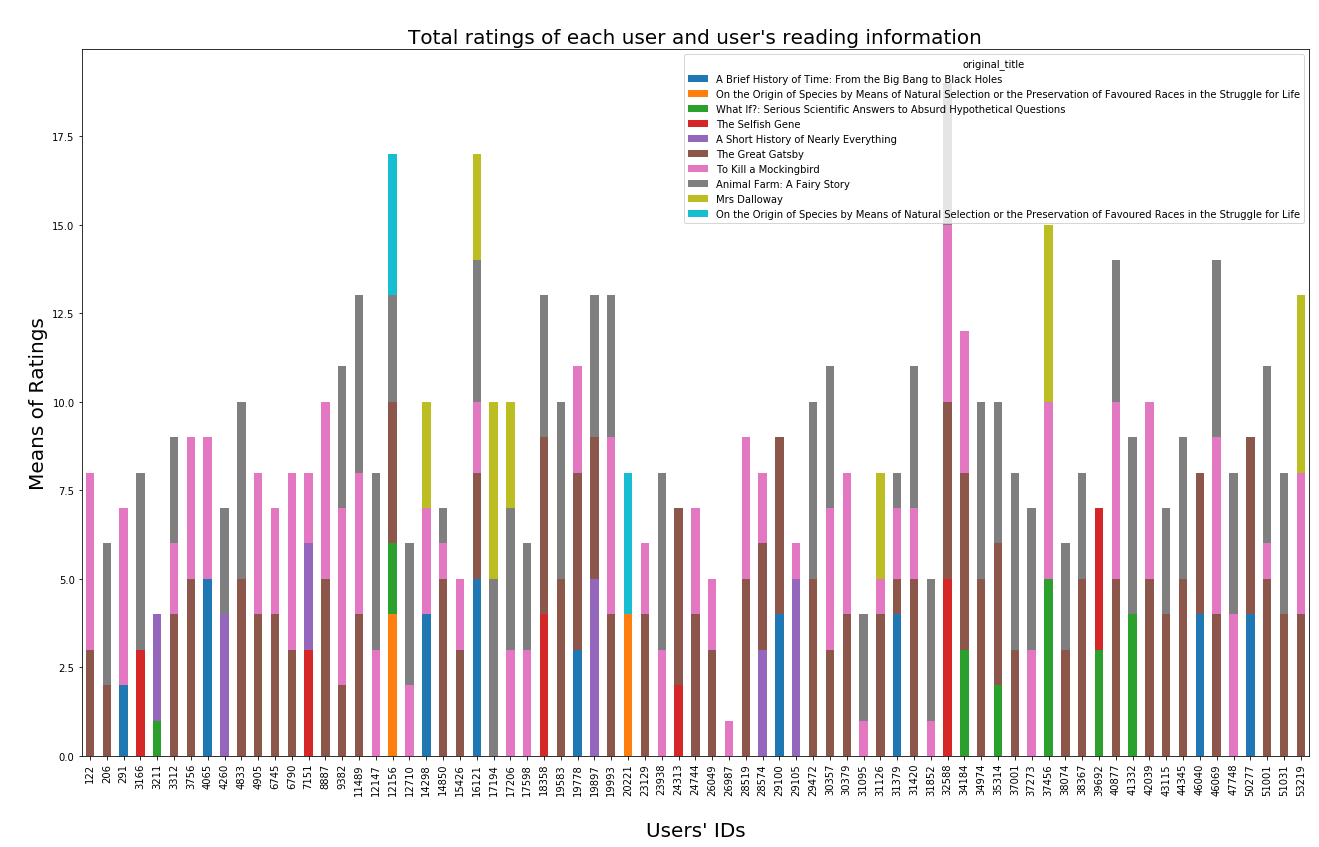

In [27]:
just_usr_df.plot.bar(stacked=True,figsize=(22, 13))
plt.xlabel("\nUsers' IDs",fontsize=20)
plt.ylabel('\nMeans of Ratings',fontsize=20)
plt.title("\nTotal ratings of each user and user's reading information",fontsize=20
          , color='black')
plt.show()

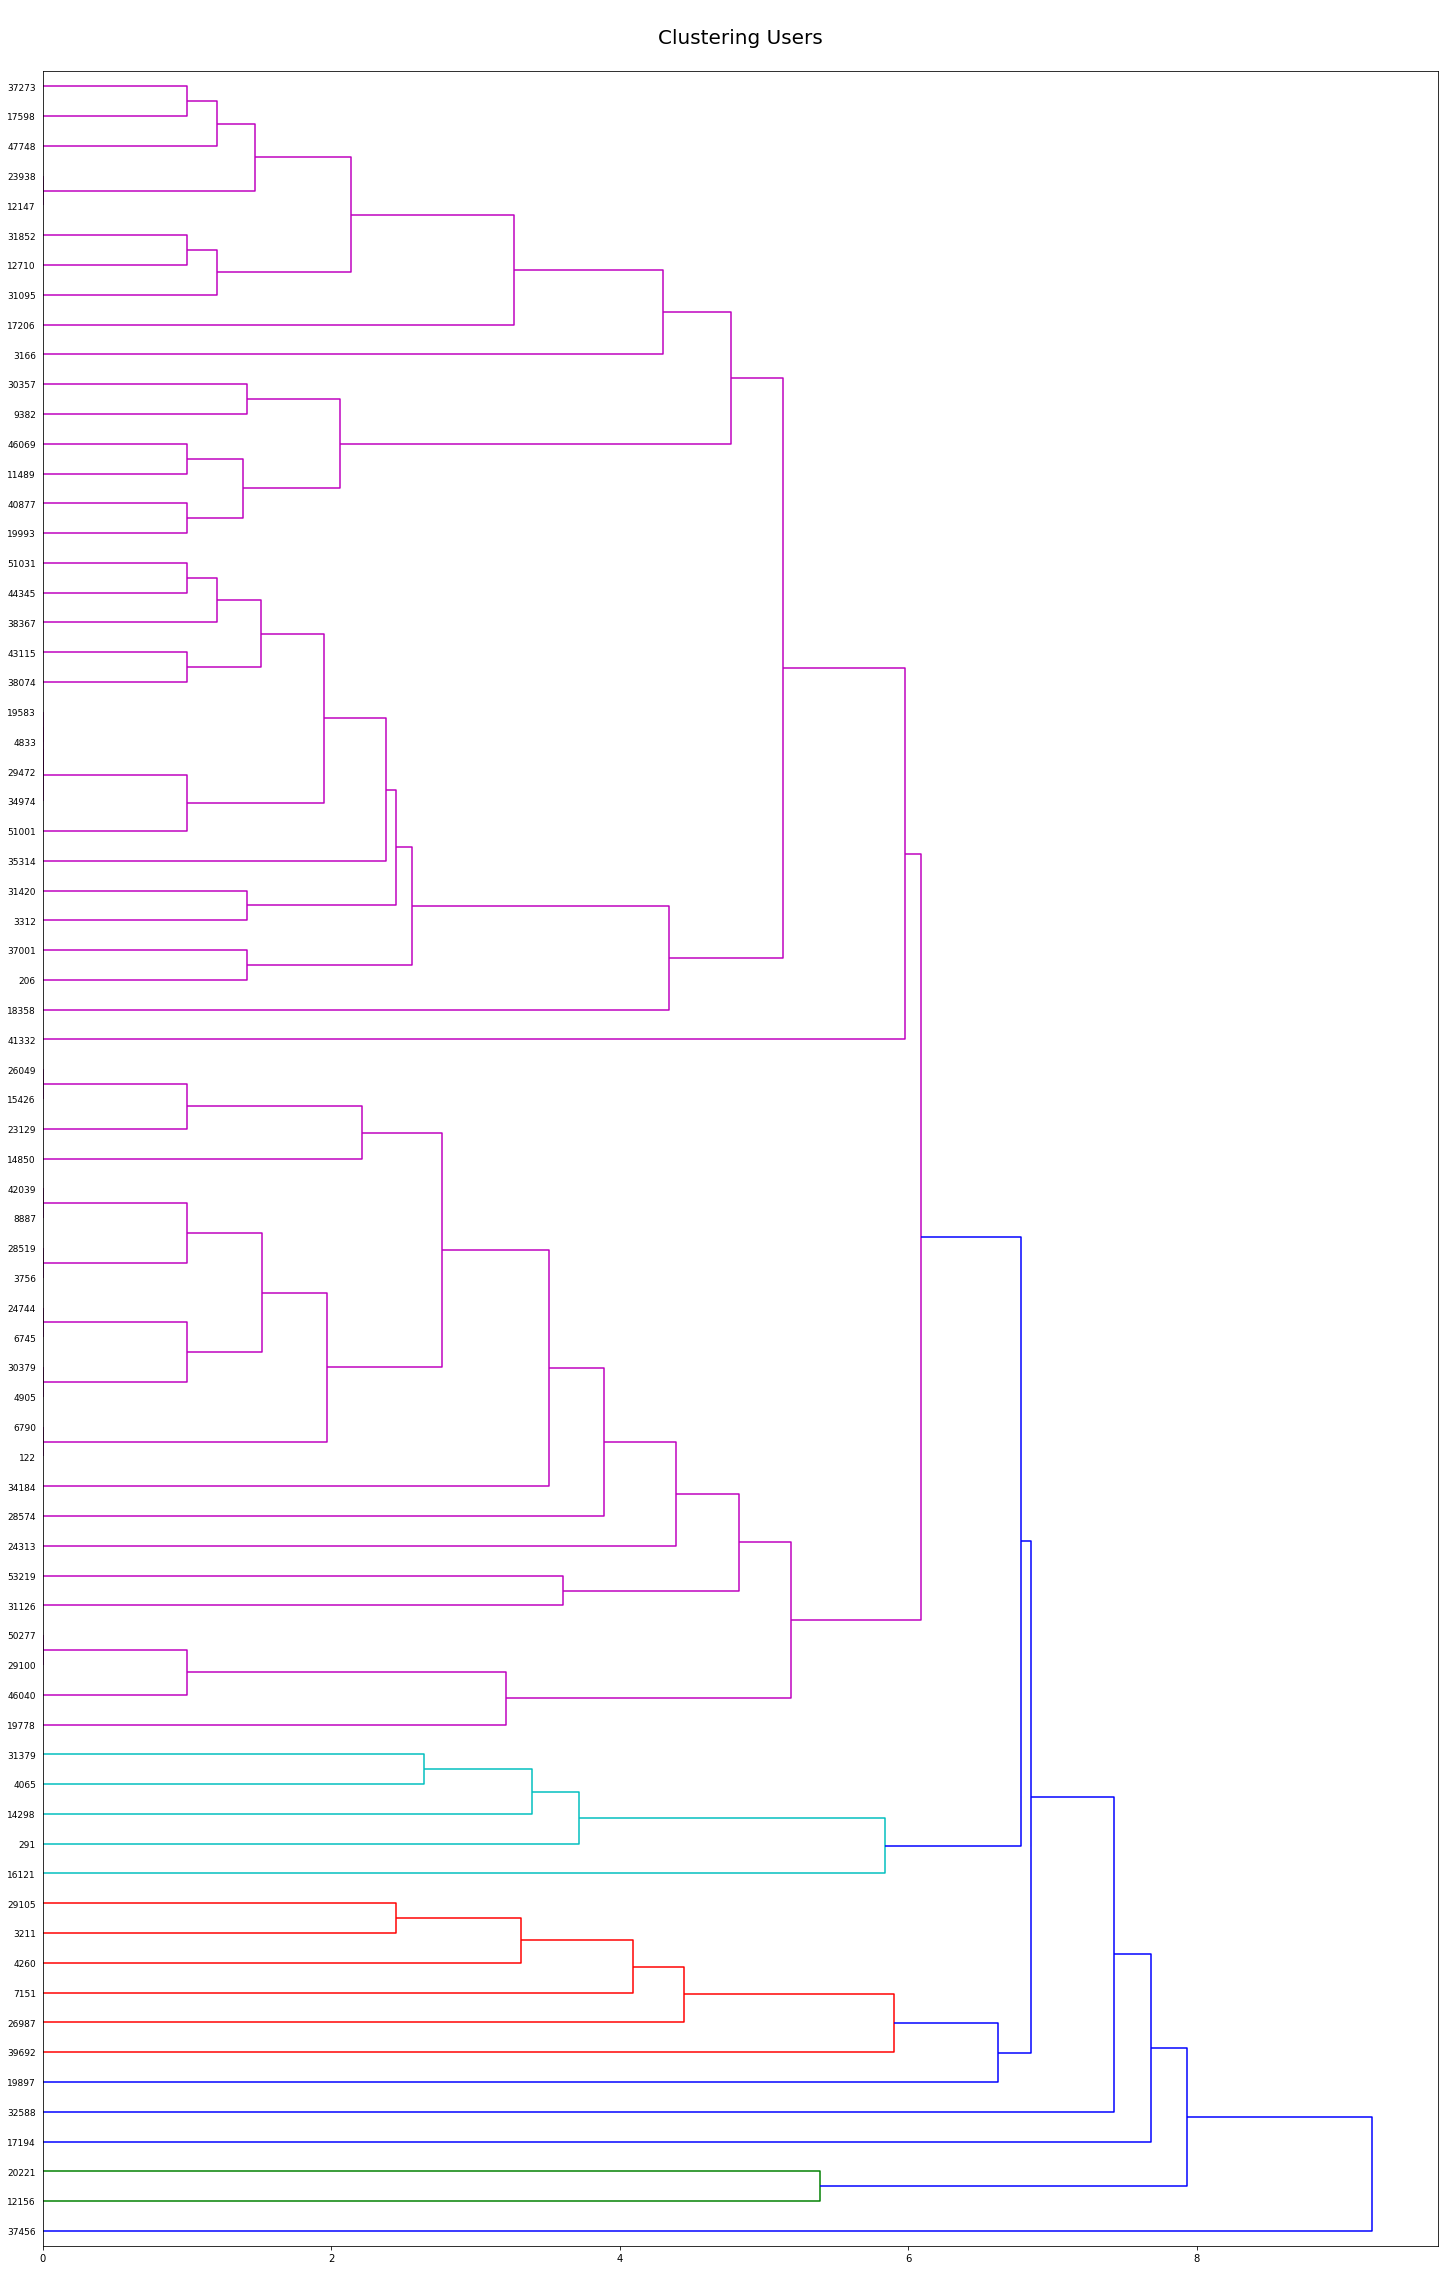

In [29]:
Z = linkage(just_usr_df,"average")
plt.figure(figsize=(25,40))
plt.title("\nClustering Users\n",fontsize=20
          , color='black')
D = dendrogram(Z=Z,orientation="right",leaf_font_size=9,labels= just_usr_df.index)

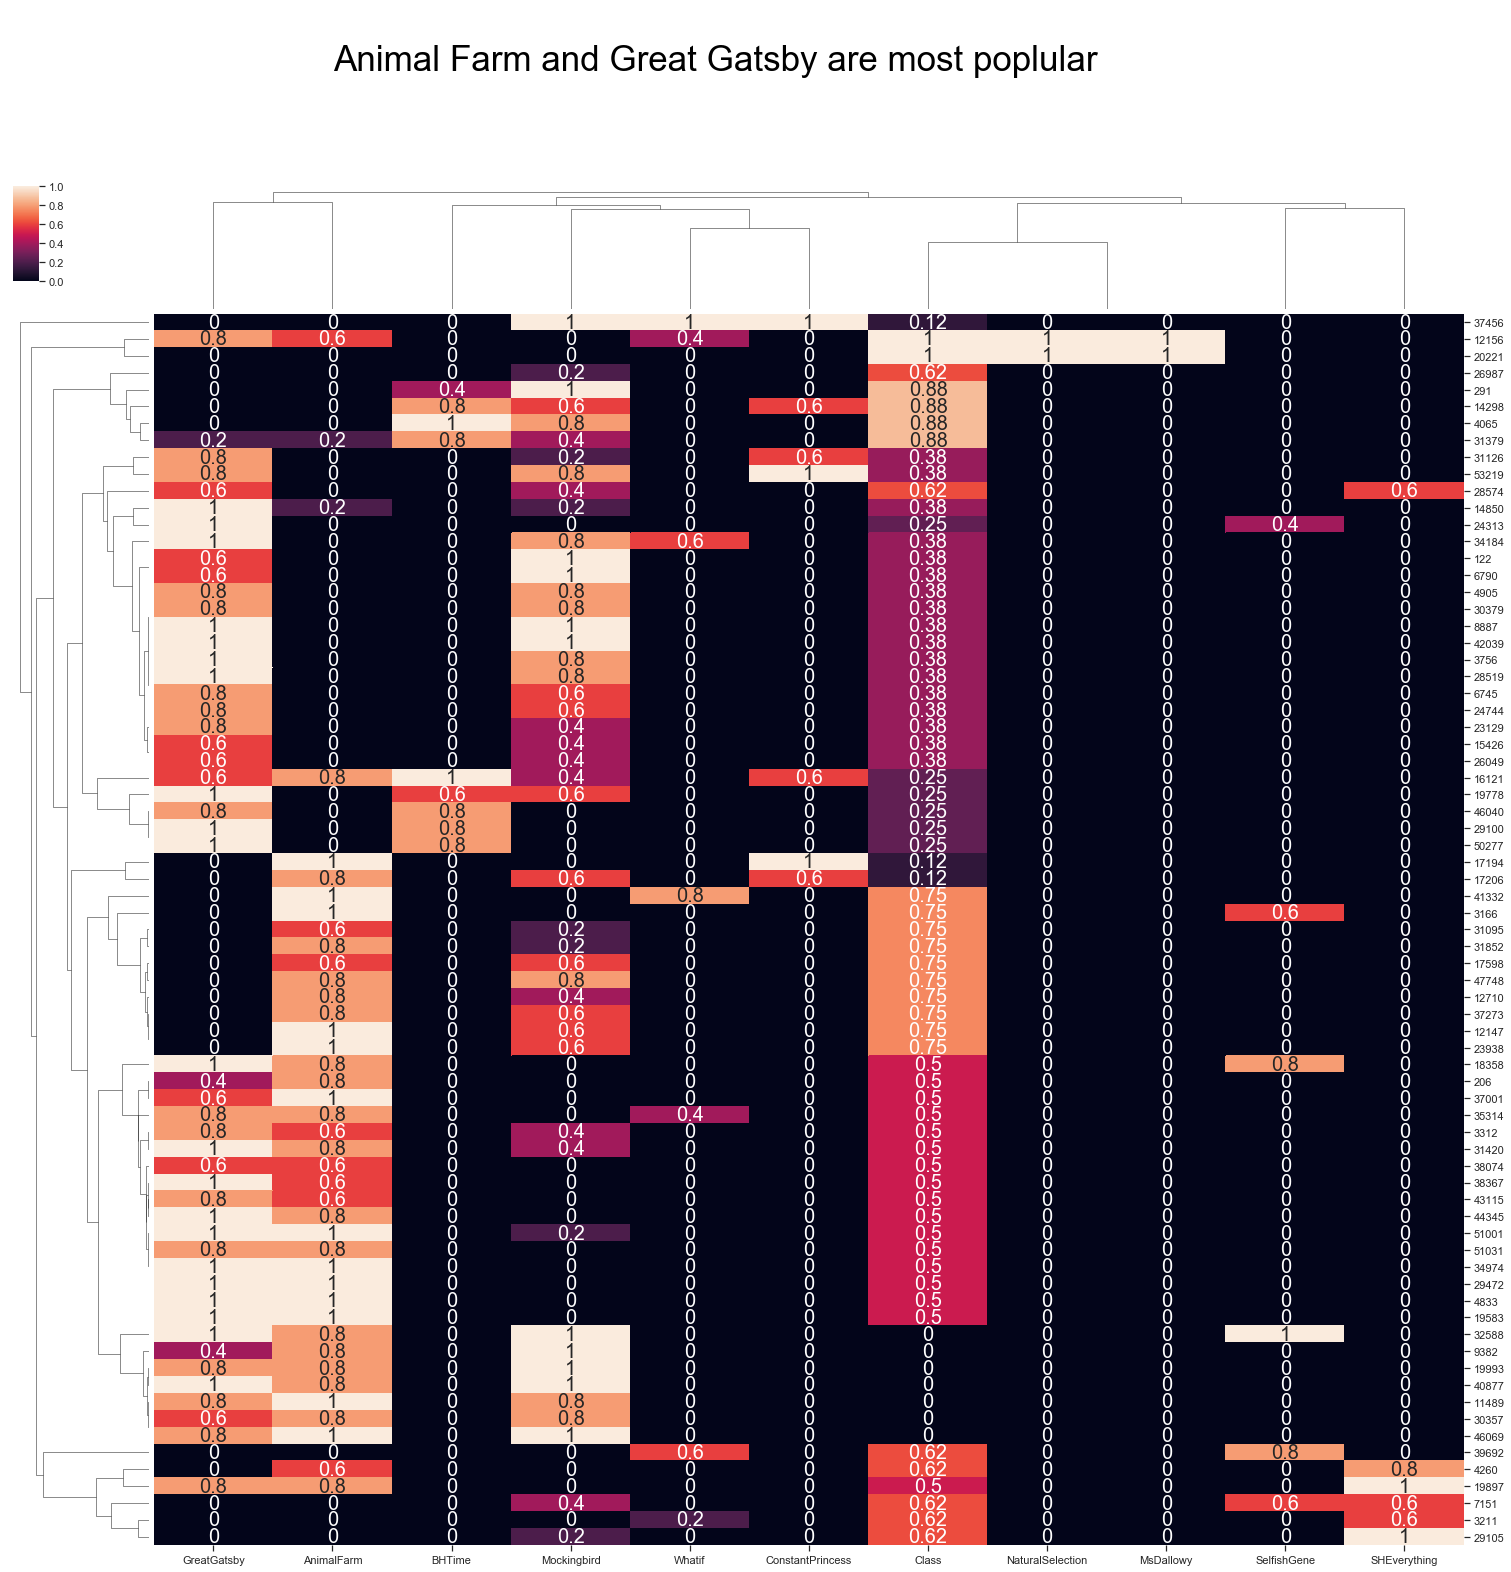

In [63]:
hc = sns.clustermap(just_usr_df, metric="correlation", method="average", standard_scale=1,
                    figsize=(26, 25),annot=True, annot_kws={"size": 20})

hc.fig.suptitle("\nAnimal Farm and Great Gatsby are most poplular\n",fontsize=35
          , color='black') 
plt.show()

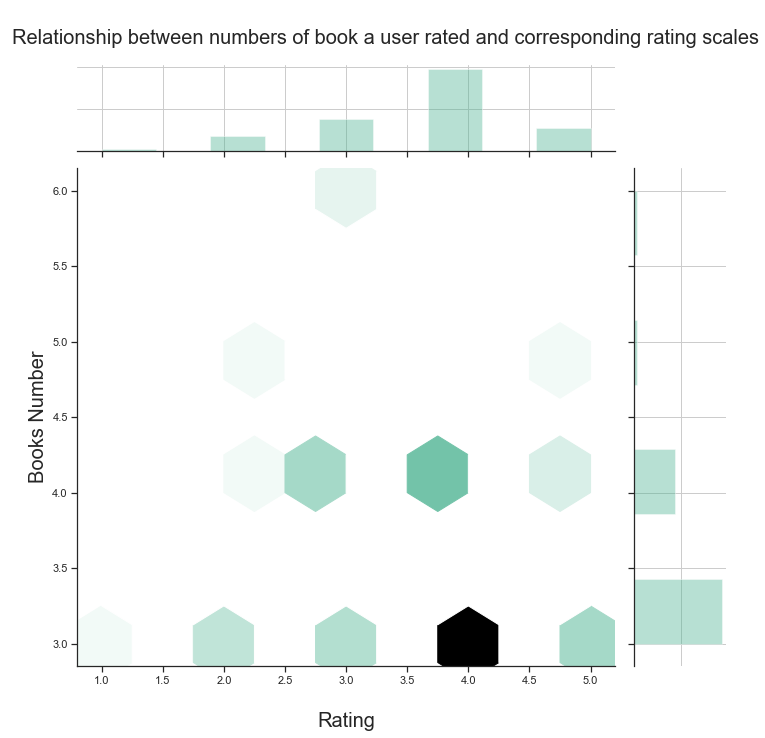

In [31]:
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
rs = np.random.RandomState(11)
rs=usr_df
x = usr_df["mean"]
y = usr_df["BN"]
ax=sns.jointplot(x,y, kind="hex", color="#4CB391",height=10)
ax.set_axis_labels( "\nRating","\nBooks Number",fontsize=20)
plt.subplots_adjust(top=0.9)
ax.fig.suptitle("\nRelationship between numbers of book a user rated and corresponding rating scales\n",fontsize=20) 
ax.ax_marg_y.grid('on') 
ax.ax_marg_x.grid('on') 



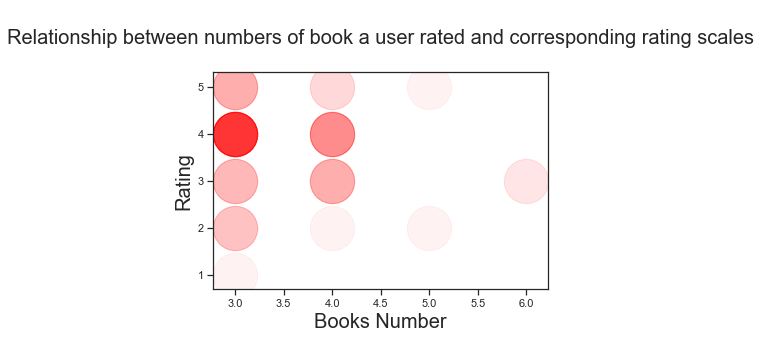

In [32]:
x = usr_df["BN"]
y = usr_df["mean"]
for i in np.arange(11):
    area=(12*(round(usr_df.iloc[:,i].mean(axis=0),1)))**2
plt.scatter(x, y, s=area,color="red", alpha=0.05)
plt.xlabel('Books Number',fontsize=20)
plt.ylabel('Rating',fontsize=20)
plt.title('\nRelationship between numbers of book a user rated and corresponding rating scales\n',fontsize=20)
plt.rcParams['figure.figsize'] = [7,5]
plt.show()

First of all, we could conclude that this datasets could give us some valuable information since users rated books differently instead of rating books all at a same rating. <br>
Second, according to the histogram, we could observe some popluar books, such as "To Kill a Mockingbird" among the sample users. The heatmap also gives us similar observations. The dendrogram gives us insights about how to cluster these sample users base on their existing ratings for selected 10 books. The headmap and cluster plot shows more detail of clustering with rating behaviors. The scatter plots show information about mean ratings with number of books that have been rated.





## Clustering

For clustering we do not need to normalize our data set because our observations are in the same range of 0 to 5
Since we have no information about users other than their ratings, we use our dendrogram to predict a good clustering number. We implemented 9 clusters and 16 clusters to see which would give us a better clustering result.

In [33]:
just_usr_df_c = just_usr_df

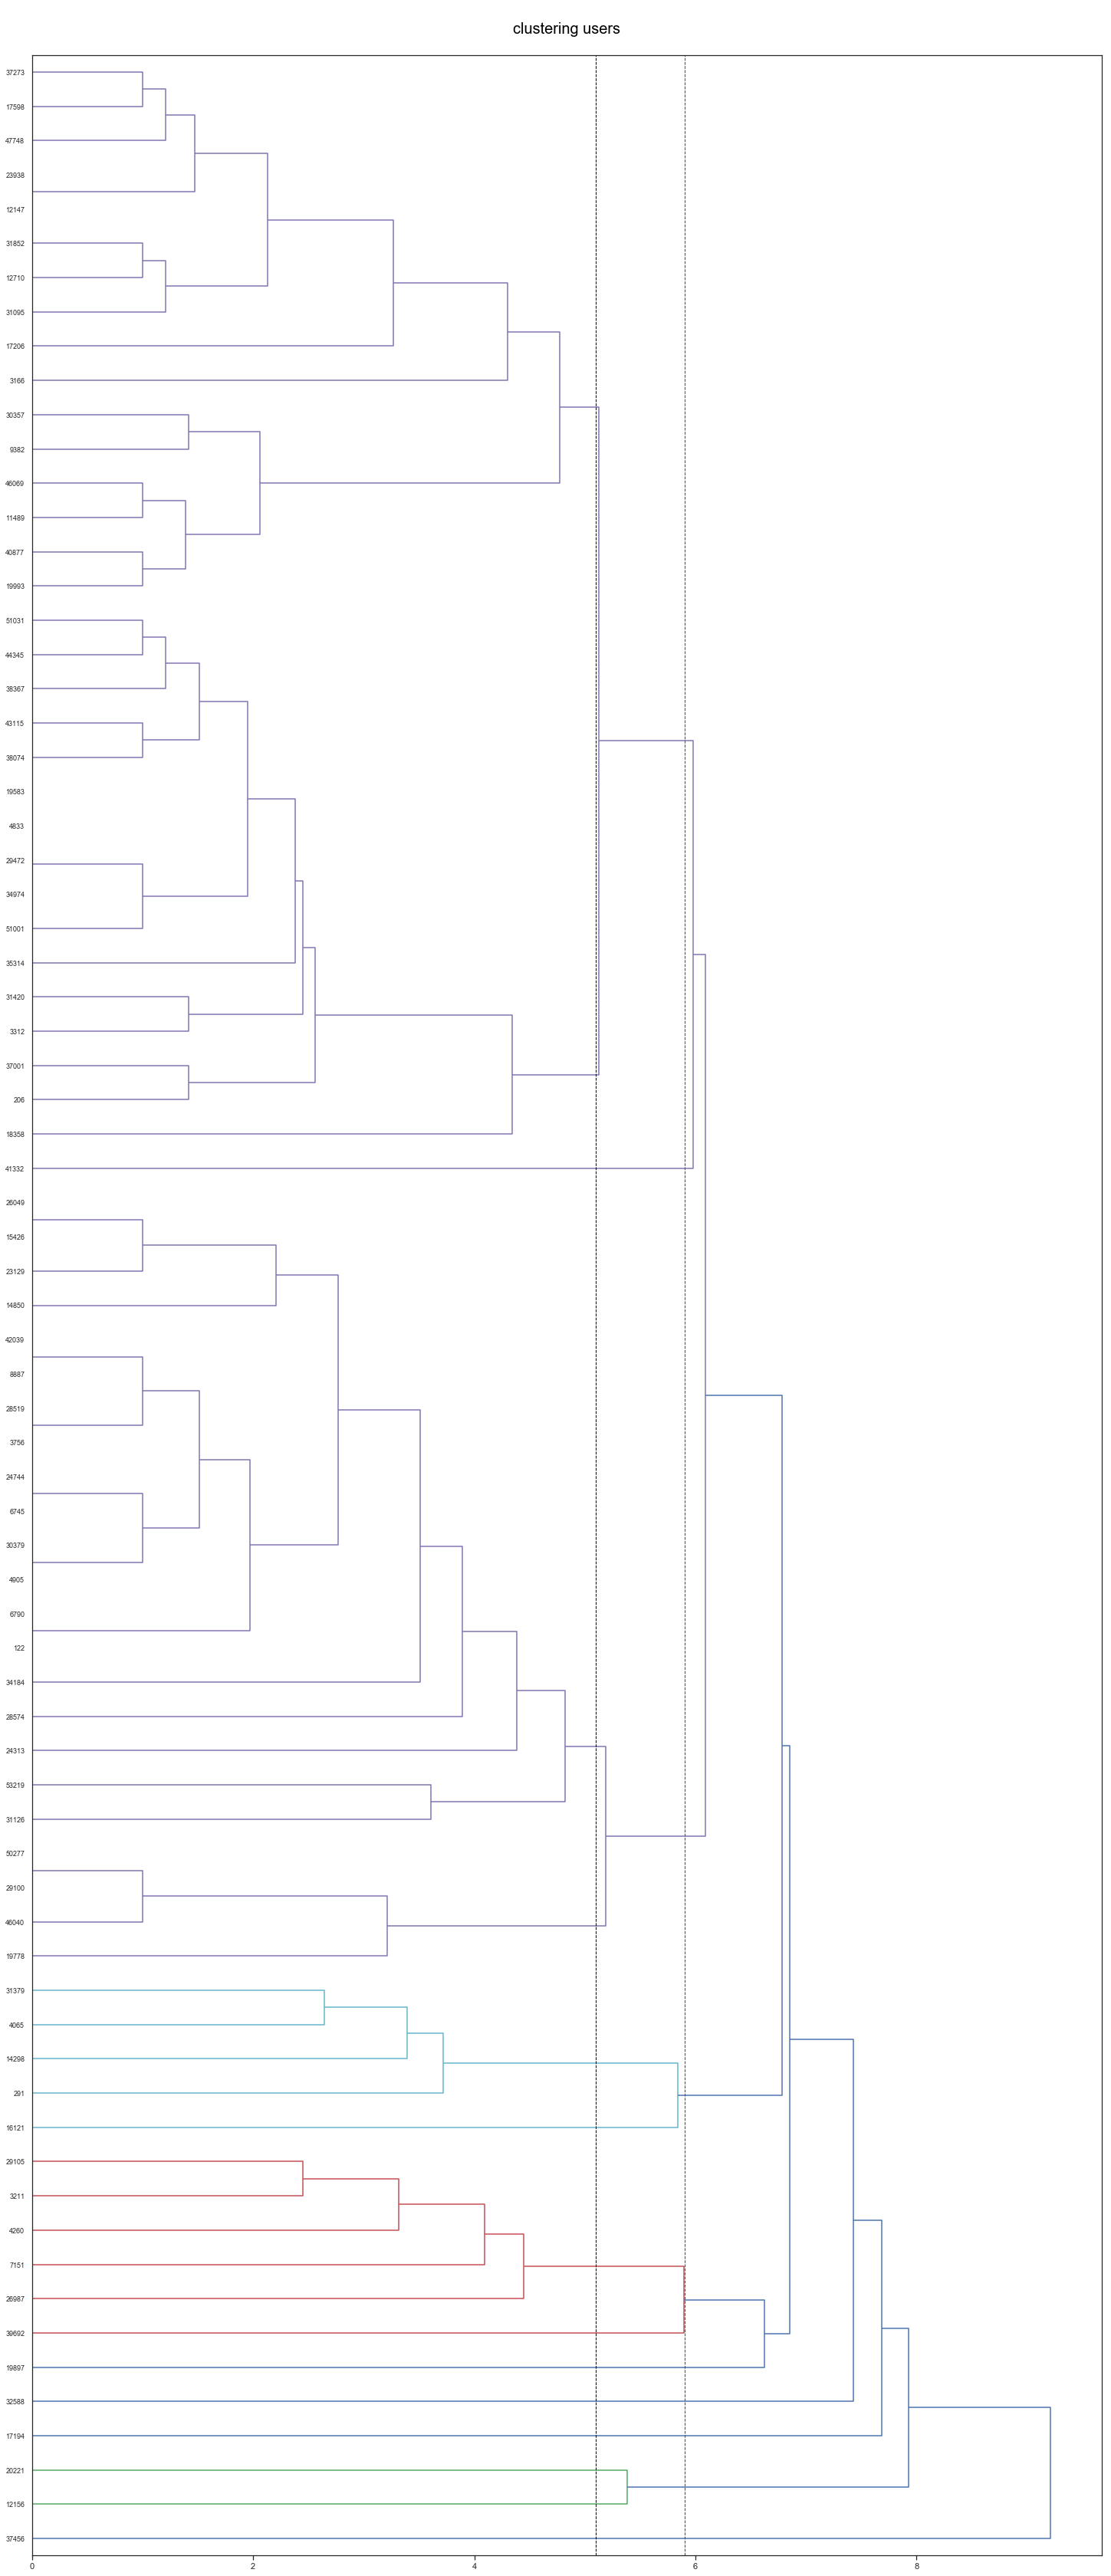

In [34]:
Z = linkage(just_usr_df_c,"average")

plt.figure(figsize=(25,60))
plt.title("\nclustering users\n",fontsize=20
          , color='black')
plt.axvline(x=5.9, c='red', lw=1, linestyle='dashed')
plt.axvline(x=5.1, c='black', lw=1, linestyle='dashed')

D = dendrogram(Z=Z,orientation="right",leaf_font_size=9,labels= just_usr_df_c.index)


## k-Means Approach

In [35]:
k = 9
model = KMeans(n_clusters = k)
model.fit(just_usr_df_c)
model.labels_

array([1, 4, 3, 2, 5, 4, 1, 3, 5, 4, 1, 1, 1, 5, 1, 0, 0, 2, 8, 2, 3, 1,
       1, 6, 2, 2, 2, 4, 4, 1, 4, 0, 8, 1, 2, 1, 1, 1, 5, 1, 1, 6, 5, 4,
       0, 1, 2, 1, 3, 4, 2, 0, 1, 4, 4, 4, 2, 7, 4, 4, 5, 0, 2, 1, 4, 4,
       6, 0, 2, 6, 4, 4, 1], dtype=int32)

In [36]:
for i in range(k):
    print("\nCluster", i)
    display(just_usr_df_c[model.labels_ == i])


Cluster 0


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
9382,0,0,0,0,0,2,5,4,0,0
11489,0,0,0,0,0,4,4,5,0,0
19993,0,0,0,0,0,4,5,4,0,0
30357,0,0,0,0,0,3,4,4,0,0
32588,0,0,0,5,0,5,5,4,0,0
40877,0,0,0,0,0,5,5,4,0,0
46069,0,0,0,0,0,4,5,5,0,0



Cluster 1


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
122,0,0,0,0,0,3,5,0,0,0
3756,0,0,0,0,0,5,4,0,0,0
4905,0,0,0,0,0,4,4,0,0,0
6745,0,0,0,0,0,4,3,0,0,0
6790,0,0,0,0,0,3,5,0,0,0
8887,0,0,0,0,0,5,5,0,0,0
14850,0,0,0,0,0,5,1,1,0,0
15426,0,0,0,0,0,3,2,0,0,0
19778,3,0,0,0,0,5,3,0,0,0
23129,0,0,0,0,0,4,2,0,0,0



Cluster 2


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
3166,0,0,0,3,0,0,0,5,0,0
12147,0,0,0,0,0,0,3,5,0,0
12710,0,0,0,0,0,0,2,4,0,0
17194,0,0,0,0,0,0,0,5,5,0
17206,0,0,0,0,0,0,3,4,3,0
17598,0,0,0,0,0,0,3,3,0,0
23938,0,0,0,0,0,0,3,5,0,0
31095,0,0,0,0,0,0,1,3,0,0
31852,0,0,0,0,0,0,1,4,0,0
37273,0,0,0,0,0,0,3,4,0,0



Cluster 3


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
291,2,0,0,0,0,0,5,0,0,0
4065,5,0,0,0,0,0,4,0,0,0
14298,4,0,0,0,0,0,3,0,3,0
31379,4,0,0,0,0,1,2,1,0,0



Cluster 4


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
206,0,0,0,0,0,2,0,4,0,0
3312,0,0,0,0,0,4,2,3,0,0
4833,0,0,0,0,0,5,0,5,0,0
18358,0,0,0,4,0,5,0,4,0,0
19583,0,0,0,0,0,5,0,5,0,0
19897,0,0,0,0,5,4,0,4,0,0
29472,0,0,0,0,0,5,0,5,0,0
31420,0,0,0,0,0,5,2,4,0,0
34974,0,0,0,0,0,5,0,5,0,0
35314,0,0,2,0,0,4,0,4,0,0



Cluster 5


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
3211,0,0,1,0,3,0,0,0,0,0
4260,0,0,0,0,4,0,0,3,0,0
7151,0,0,0,3,3,0,2,0,0,0
26987,0,0,0,0,0,0,1,0,0,0
29105,0,0,0,0,5,0,1,0,0,0
39692,0,0,3,4,0,0,0,0,0,0



Cluster 6


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
16121,5,0,0,0,0,3,2,4,3,0
29100,4,0,0,0,0,5,0,0,0,0
46040,4,0,0,0,0,4,0,0,0,0
50277,4,0,0,0,0,5,0,0,0,0



Cluster 7


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
37456,0,0,5,0,0,0,5,0,5,0



Cluster 8


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
12156,0,4,2,0,0,4,0,3,0,4
20221,0,4,0,0,0,0,0,0,0,4


In [37]:
k = 16
model = KMeans(n_clusters = k)
model.fit(just_usr_df_c)
model.labels_

array([11,  6,  5,  6,  4,  2, 11, 15,  4,  2, 11, 11, 11,  4, 11,  9,  9,
       14, 10, 14, 15,  1,  1, 13,  3,  3, 14,  2,  2,  7,  2,  9, 10,  1,
       14,  1, 11,  1,  4, 11,  1,  7,  4,  2,  9, 11,  6,  1, 15,  2,  6,
        8, 11,  2,  2,  2, 14,  0,  2,  2,  4,  9,  6, 11,  2,  2,  7,  9,
       14,  7,  2,  2, 12], dtype=int32)

In [38]:
for i in range(k):
    print("\nCluster", i)
    display(just_usr_df_c[model.labels_ == i])


Cluster 0


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
37456,0,0,5,0,0,0,5,0,5,0



Cluster 1


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
14850,0,0,0,0,0,5,1,1,0,0
15426,0,0,0,0,0,3,2,0,0,0
23129,0,0,0,0,0,4,2,0,0,0
24313,0,0,0,2,0,5,0,0,0,0
26049,0,0,0,0,0,3,2,0,0,0
28574,0,0,0,0,3,3,2,0,0,0
31126,0,0,0,0,0,4,1,0,3,0



Cluster 2


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
3312,0,0,0,0,0,4,2,3,0,0
4833,0,0,0,0,0,5,0,5,0,0
18358,0,0,0,4,0,5,0,4,0,0
19583,0,0,0,0,0,5,0,5,0,0
19897,0,0,0,0,5,4,0,4,0,0
29472,0,0,0,0,0,5,0,5,0,0
31420,0,0,0,0,0,5,2,4,0,0
34974,0,0,0,0,0,5,0,5,0,0
35314,0,0,2,0,0,4,0,4,0,0
37001,0,0,0,0,0,3,0,5,0,0



Cluster 3


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
17194,0,0,0,0,0,0,0,5,5,0
17206,0,0,0,0,0,0,3,4,3,0



Cluster 4


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
3211,0,0,1,0,3,0,0,0,0,0
4260,0,0,0,0,4,0,0,3,0,0
7151,0,0,0,3,3,0,2,0,0,0
26987,0,0,0,0,0,0,1,0,0,0
29105,0,0,0,0,5,0,1,0,0,0
39692,0,0,3,4,0,0,0,0,0,0



Cluster 5


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
291,2,0,0,0,0,0,5,0,0,0



Cluster 6


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
206,0,0,0,0,0,2,0,4,0,0
3166,0,0,0,3,0,0,0,5,0,0
31095,0,0,0,0,0,0,1,3,0,0
31852,0,0,0,0,0,0,1,4,0,0
41332,0,0,4,0,0,0,0,5,0,0



Cluster 7


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
19778,3,0,0,0,0,5,3,0,0,0
29100,4,0,0,0,0,5,0,0,0,0
46040,4,0,0,0,0,4,0,0,0,0
50277,4,0,0,0,0,5,0,0,0,0



Cluster 8


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
32588,0,0,0,5,0,5,5,4,0,0



Cluster 9


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
9382,0,0,0,0,0,2,5,4,0,0
11489,0,0,0,0,0,4,4,5,0,0
19993,0,0,0,0,0,4,5,4,0,0
30357,0,0,0,0,0,3,4,4,0,0
40877,0,0,0,0,0,5,5,4,0,0
46069,0,0,0,0,0,4,5,5,0,0



Cluster 10


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
12156,0,4,2,0,0,4,0,3,0,4
20221,0,4,0,0,0,0,0,0,0,4



Cluster 11


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
122,0,0,0,0,0,3,5,0,0,0
3756,0,0,0,0,0,5,4,0,0,0
4905,0,0,0,0,0,4,4,0,0,0
6745,0,0,0,0,0,4,3,0,0,0
6790,0,0,0,0,0,3,5,0,0,0
8887,0,0,0,0,0,5,5,0,0,0
24744,0,0,0,0,0,4,3,0,0,0
28519,0,0,0,0,0,5,4,0,0,0
30379,0,0,0,0,0,4,4,0,0,0
34184,0,0,3,0,0,5,4,0,0,0



Cluster 12


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
53219,0,0,0,0,0,4,4,0,5,0



Cluster 13


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
16121,5,0,0,0,0,3,2,4,3,0



Cluster 14


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
12147,0,0,0,0,0,0,3,5,0,0
12710,0,0,0,0,0,0,2,4,0,0
17598,0,0,0,0,0,0,3,3,0,0
23938,0,0,0,0,0,0,3,5,0,0
37273,0,0,0,0,0,0,3,4,0,0
47748,0,0,0,0,0,0,4,4,0,0



Cluster 15


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
4065,5,0,0,0,0,0,4,0,0,0
14298,4,0,0,0,0,0,3,0,3,0
31379,4,0,0,0,0,1,2,1,0,0


We prefer K=9 because in the more detailed clustering model, the clustering goes based on zeros. Because we do not know whether users will like the book after reading it or not, it is not a wise choice to classify users based on the books that they haven't read yet(zeros).
For example, users 6745,6790,8887 have the same taste of books. However, in K=16, user 6745 is seperated and cluster in class 5 with user number 14850 who ranked one of the user 6745's top rated books so low. Therefore, classification of k=9 is better than k=16

## Hierarchical Clustering Approach

In [39]:
k=16
dend_clusters = fcluster(Z, k, criterion='maxclust')
dend_clusters

array([10, 11,  6, 12,  3, 11, 10,  6,  3, 11, 10, 10, 10,  3, 10, 12, 12,
       12,  1, 12,  6, 10, 10,  7, 15, 12, 12, 11, 11,  8,  5, 12,  2, 10,
       12, 10, 10, 10,  3, 10, 10,  8,  3, 11, 12, 10, 12,  9,  6, 11, 12,
       14, 10, 11, 11, 11, 12, 16, 11, 11,  4, 12, 13, 10, 11, 11,  8, 12,
       12,  8, 11, 11,  9], dtype=int32)

In [40]:
for i in range(1,k+1):
    print("\nCluster", i)
    display(just_usr_df_c[dend_clusters == i])


Cluster 1


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
12156,0,4,2,0,0,4,0,3,0,4



Cluster 2


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
20221,0,4,0,0,0,0,0,0,0,4



Cluster 3


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
3211,0,0,1,0,3,0,0,0,0,0
4260,0,0,0,0,4,0,0,3,0,0
7151,0,0,0,3,3,0,2,0,0,0
26987,0,0,0,0,0,0,1,0,0,0
29105,0,0,0,0,5,0,1,0,0,0



Cluster 4


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
39692,0,0,3,4,0,0,0,0,0,0



Cluster 5


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
19897,0,0,0,0,5,4,0,4,0,0



Cluster 6


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
291,2,0,0,0,0,0,5,0,0,0
4065,5,0,0,0,0,0,4,0,0,0
14298,4,0,0,0,0,0,3,0,3,0
31379,4,0,0,0,0,1,2,1,0,0



Cluster 7


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
16121,5,0,0,0,0,3,2,4,3,0



Cluster 8


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
19778,3,0,0,0,0,5,3,0,0,0
29100,4,0,0,0,0,5,0,0,0,0
46040,4,0,0,0,0,4,0,0,0,0
50277,4,0,0,0,0,5,0,0,0,0



Cluster 9


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
31126,0,0,0,0,0,4,1,0,3,0
53219,0,0,0,0,0,4,4,0,5,0



Cluster 10


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
122,0,0,0,0,0,3,5,0,0,0
3756,0,0,0,0,0,5,4,0,0,0
4905,0,0,0,0,0,4,4,0,0,0
6745,0,0,0,0,0,4,3,0,0,0
6790,0,0,0,0,0,3,5,0,0,0
8887,0,0,0,0,0,5,5,0,0,0
14850,0,0,0,0,0,5,1,1,0,0
15426,0,0,0,0,0,3,2,0,0,0
23129,0,0,0,0,0,4,2,0,0,0
24313,0,0,0,2,0,5,0,0,0,0



Cluster 11


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
206,0,0,0,0,0,2,0,4,0,0
3312,0,0,0,0,0,4,2,3,0,0
4833,0,0,0,0,0,5,0,5,0,0
18358,0,0,0,4,0,5,0,4,0,0
19583,0,0,0,0,0,5,0,5,0,0
29472,0,0,0,0,0,5,0,5,0,0
31420,0,0,0,0,0,5,2,4,0,0
34974,0,0,0,0,0,5,0,5,0,0
35314,0,0,2,0,0,4,0,4,0,0
37001,0,0,0,0,0,3,0,5,0,0



Cluster 12


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
3166,0,0,0,3,0,0,0,5,0,0
9382,0,0,0,0,0,2,5,4,0,0
11489,0,0,0,0,0,4,4,5,0,0
12147,0,0,0,0,0,0,3,5,0,0
12710,0,0,0,0,0,0,2,4,0,0
17206,0,0,0,0,0,0,3,4,3,0
17598,0,0,0,0,0,0,3,3,0,0
19993,0,0,0,0,0,4,5,4,0,0
23938,0,0,0,0,0,0,3,5,0,0
30357,0,0,0,0,0,3,4,4,0,0



Cluster 13


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
41332,0,0,4,0,0,0,0,5,0,0



Cluster 14


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
32588,0,0,0,5,0,5,5,4,0,0



Cluster 15


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
17194,0,0,0,0,0,0,0,5,5,0



Cluster 16


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
37456,0,0,5,0,0,0,5,0,5,0


In [41]:
k=9
dend_clusters = fcluster(Z, k, criterion='maxclust')
dend_clusters

array([5, 6, 4, 6, 2, 6, 5, 4, 2, 6, 5, 5, 5, 2, 5, 6, 6, 6, 1, 6, 4, 5,
       5, 4, 8, 6, 6, 6, 6, 5, 3, 6, 1, 5, 6, 5, 5, 5, 2, 5, 5, 5, 2, 6,
       6, 5, 6, 5, 4, 6, 6, 7, 5, 6, 6, 6, 6, 9, 6, 6, 2, 6, 6, 5, 6, 6,
       5, 6, 6, 5, 6, 6, 5], dtype=int32)

In [42]:
for i in range(1,k+1):
    print("\nCluster", i)
    display(just_usr_df_c[dend_clusters == i])


Cluster 1


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
12156,0,4,2,0,0,4,0,3,0,4
20221,0,4,0,0,0,0,0,0,0,4



Cluster 2


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
3211,0,0,1,0,3,0,0,0,0,0
4260,0,0,0,0,4,0,0,3,0,0
7151,0,0,0,3,3,0,2,0,0,0
26987,0,0,0,0,0,0,1,0,0,0
29105,0,0,0,0,5,0,1,0,0,0
39692,0,0,3,4,0,0,0,0,0,0



Cluster 3


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
19897,0,0,0,0,5,4,0,4,0,0



Cluster 4


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
291,2,0,0,0,0,0,5,0,0,0
4065,5,0,0,0,0,0,4,0,0,0
14298,4,0,0,0,0,0,3,0,3,0
16121,5,0,0,0,0,3,2,4,3,0
31379,4,0,0,0,0,1,2,1,0,0



Cluster 5


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
122,0,0,0,0,0,3,5,0,0,0
3756,0,0,0,0,0,5,4,0,0,0
4905,0,0,0,0,0,4,4,0,0,0
6745,0,0,0,0,0,4,3,0,0,0
6790,0,0,0,0,0,3,5,0,0,0
8887,0,0,0,0,0,5,5,0,0,0
14850,0,0,0,0,0,5,1,1,0,0
15426,0,0,0,0,0,3,2,0,0,0
19778,3,0,0,0,0,5,3,0,0,0
23129,0,0,0,0,0,4,2,0,0,0



Cluster 6


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
206,0,0,0,0,0,2,0,4,0,0
3166,0,0,0,3,0,0,0,5,0,0
3312,0,0,0,0,0,4,2,3,0,0
4833,0,0,0,0,0,5,0,5,0,0
9382,0,0,0,0,0,2,5,4,0,0
11489,0,0,0,0,0,4,4,5,0,0
12147,0,0,0,0,0,0,3,5,0,0
12710,0,0,0,0,0,0,2,4,0,0
17206,0,0,0,0,0,0,3,4,3,0
17598,0,0,0,0,0,0,3,3,0,0



Cluster 7


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
32588,0,0,0,5,0,5,5,4,0,0



Cluster 8


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
17194,0,0,0,0,0,0,0,5,5,0



Cluster 9


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life
37456,0,0,5,0,0,0,5,0,5,0


<b>K=16 is not efficent because the clustering goes based on zeros. Because we do not know whether users will like the book after reading it or not, it is not a wise choice to classify users based on the books that they haven't read yet (zeros).</b>
<b> For example, users in cluster 1 and 2 (k=16) have very similar taste in books, but they are in different classes just based on the books that they haven't read yet. </b>

## kNN Clustering Approach

In [43]:
k = 9
model = KMeans(n_clusters = k)
model.fit(just_usr_df_c)
model.labels_
just_usr_df_c["Class"]=model.labels_
for i in range(k):
    print("\nCluster", i)
    display(just_usr_df_c[model.labels_ == i])


Cluster 0


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,Class
9382,0,0,0,0,0,2,5,4,0,0,0
11489,0,0,0,0,0,4,4,5,0,0,0
19993,0,0,0,0,0,4,5,4,0,0,0
30357,0,0,0,0,0,3,4,4,0,0,0
32588,0,0,0,5,0,5,5,4,0,0,0
40877,0,0,0,0,0,5,5,4,0,0,0
46069,0,0,0,0,0,4,5,5,0,0,0



Cluster 1


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,Class
17194,0,0,0,0,0,0,0,5,5,0,1
17206,0,0,0,0,0,0,3,4,3,0,1
37456,0,0,5,0,0,0,5,0,5,0,1



Cluster 2


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,Class
16121,5,0,0,0,0,3,2,4,3,0,2
19778,3,0,0,0,0,5,3,0,0,0,2
24313,0,0,0,2,0,5,0,0,0,0,2
29100,4,0,0,0,0,5,0,0,0,0,2
46040,4,0,0,0,0,4,0,0,0,0,2
50277,4,0,0,0,0,5,0,0,0,0,2



Cluster 3


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,Class
122,0,0,0,0,0,3,5,0,0,0,3
3756,0,0,0,0,0,5,4,0,0,0,3
4905,0,0,0,0,0,4,4,0,0,0,3
6745,0,0,0,0,0,4,3,0,0,0,3
6790,0,0,0,0,0,3,5,0,0,0,3
8887,0,0,0,0,0,5,5,0,0,0,3
14850,0,0,0,0,0,5,1,1,0,0,3
15426,0,0,0,0,0,3,2,0,0,0,3
23129,0,0,0,0,0,4,2,0,0,0,3
24744,0,0,0,0,0,4,3,0,0,0,3



Cluster 4


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,Class
206,0,0,0,0,0,2,0,4,0,0,4
3312,0,0,0,0,0,4,2,3,0,0,4
4833,0,0,0,0,0,5,0,5,0,0,4
18358,0,0,0,4,0,5,0,4,0,0,4
19583,0,0,0,0,0,5,0,5,0,0,4
19897,0,0,0,0,5,4,0,4,0,0,4
29472,0,0,0,0,0,5,0,5,0,0,4
31420,0,0,0,0,0,5,2,4,0,0,4
34974,0,0,0,0,0,5,0,5,0,0,4
35314,0,0,2,0,0,4,0,4,0,0,4



Cluster 5


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,Class
3211,0,0,1,0,3,0,0,0,0,0,5
4260,0,0,0,0,4,0,0,3,0,0,5
7151,0,0,0,3,3,0,2,0,0,0,5
26987,0,0,0,0,0,0,1,0,0,0,5
28574,0,0,0,0,3,3,2,0,0,0,5
29105,0,0,0,0,5,0,1,0,0,0,5
39692,0,0,3,4,0,0,0,0,0,0,5



Cluster 6


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,Class
3166,0,0,0,3,0,0,0,5,0,0,6
12147,0,0,0,0,0,0,3,5,0,0,6
12710,0,0,0,0,0,0,2,4,0,0,6
17598,0,0,0,0,0,0,3,3,0,0,6
23938,0,0,0,0,0,0,3,5,0,0,6
31095,0,0,0,0,0,0,1,3,0,0,6
31852,0,0,0,0,0,0,1,4,0,0,6
37273,0,0,0,0,0,0,3,4,0,0,6
41332,0,0,4,0,0,0,0,5,0,0,6
47748,0,0,0,0,0,0,4,4,0,0,6



Cluster 7


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,Class
291,2,0,0,0,0,0,5,0,0,0,7
4065,5,0,0,0,0,0,4,0,0,0,7
14298,4,0,0,0,0,0,3,0,3,0,7
31379,4,0,0,0,0,1,2,1,0,0,7



Cluster 8


original_title,A Brief History of Time: From the Big Bang to Black Holes,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,What If?: Serious Scientific Answers to Absurd Hypothetical Questions,The Selfish Gene,A Short History of Nearly Everything,The Great Gatsby,To Kill a Mockingbird,Animal Farm: A Fairy Story,Mrs Dalloway,On the Origin of Species by Means of Natural Selection or the Preservation of Favoured Races in the Struggle for Life,Class
12156,0,4,2,0,0,4,0,3,0,4,8
20221,0,4,0,0,0,0,0,0,0,4,8


In [44]:
just_usr_df_c.columns=["BHTime","NaturalSelection","Whatif","SelfishGene","SHEverything"
                     ,"GreatGatsby","Mockingbird","AnimalFarm","ConstantPrincess","MsDallowy","Class"]

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =8 , p = 2)# p=2 for euclidean distance
X=just_usr_df_c[just_usr_df_c.columns[[0,1,2,3,4,5,6,7,8,9]]]
Y= just_usr_df_c.iloc[:,[10]]
knn.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [46]:
just_usr_df_c.columns

Index(['BHTime', 'NaturalSelection', 'Whatif', 'SelfishGene', 'SHEverything',
       'GreatGatsby', 'Mockingbird', 'AnimalFarm', 'ConstantPrincess',
       'MsDallowy', 'Class'],
      dtype='object')

In [47]:
classification = ["0","1","2","3","4","5","6","7","8"]

print("\nIf you have read following books, rank them from one to five, otherwise put zero:")
BHTime = float(input("A Brief History of Time(1/5) = "))
NaturalSelection = float(input("Natural Selection (1/5) = "))
Whaif = float(input("What If?: Serious Scientific Answers to Absurd Hypothetical Questions (1/5) = "))
SelfishGene = float(input("The Selfish Gene (1/5) = "))
SHEverything = float(input("A Short History of Nearly Everything(1/5) = "))
GreatGatsby = float(input("The Great Gatsby(1/5) = "))
Mockingbird = float(input("To Kill a Mockingbird (1/5) = "))
AnimalFarm = float(input("Animal Farm (1/5) = "))
ConstantPrincess = float(input("The Constant Princess (1/5) = "))
MrsDalloway = float(input("Mrs Dalloway (1/5) = "))


data_class = knn.predict(np.array([BHTime,NaturalSelection,Whaif,SelfishGene,SHEverything,GreatGatsby,
       Mockingbird,AnimalFarm, ConstantPrincess,MrsDalloway]).reshape(1, -1))[0]
print("\nUser is in the class %s"%classification[data_class])


If you have read following books, rank them from one to five, otherwise put zero:
A Brief History of Time(1/5) = 5
Natural Selection (1/5) = 1
What If?: Serious Scientific Answers to Absurd Hypothetical Questions (1/5) = 5
The Selfish Gene (1/5) = 5
A Short History of Nearly Everything(1/5) = 5
The Great Gatsby(1/5) = 1
To Kill a Mockingbird (1/5) = 5
Animal Farm (1/5) = 5
The Constant Princess (1/5) = 1
Mrs Dalloway (1/5) = 1

User is in the class 0


In KNN model we select K=9 from K mean clustering, and creat a column called Class, which shows the class of all users according K-Means fit model.
In KNN prediction model, we ask users to rate our books form 1 to 5 or 0 if they did not heard about a book. Then, we return a class number in which users belong to.

## Outcome

From our clustering model, we could observe existing users' interest. Most of the users like fictions (such as "To Kill a Mockingbird", "Animal Farm", "The Great Gatsby") and rated them high. Few people like books related to life science or history topic. <br>

In this case, it would be a good idea for the librarians to organize weekly/ monthly book meetup events related to fictions since the result has shown majority users have great interested in this genre. A booklist of new fictions, science or history books could be printed out as flyers at the front desk for reference and recommendations. <br>

When new users come, we can derive which cluster they belong to by asking them to rate these 10 books, and thus, give them fairly good recommendation about books and future events information.

## Report

Our project's goal is to give our stakeholder (librarians in county libraries), who want to enhance communication and reading culture among their existing members, some insights to plan book events or recommendations for a booklist. Also, When a new user comes, they can find existing members who share a similar taste with this new user, and base on these existing members' information, recommend books that this new user will hopefully enjoy. <br>
  

When this project was first started, we understood the datasets was extremely large (10k books and nearly 1 million users) and required many steps of data cleaning. To tackle this problem, We randomly select 200 users to reduce our dataset dimension and make our operations and analysis more efficient. By restricting users who have rated more than twice, we could increase the quality of users' ratings. For increase our dataset efficiency, we tried to selected ten from different genres to generate diverse interests. Besides, we eliminated duplicated data and constructed a fairly good user-item table to be prepared for future clustering analysis. <br>

For our visualization part, the plots validate our selection of datasets and reasons for data cleanings. Moreover, the visualization gives us detail information about how to cluster our existing users and new users. <br>

We implemented different size of clusters and landed on 9 clusters for our users, who share similar book interests. Continuing from the visualization part, we could also observe the general taste of our sample users that majority users like fictions and few people like science or history related books. Last, we asked new users to rate selected 10 books to cluster them into one of the nine clusters. <br>

In all, we could conclude that our project well served our initial goal and provided our stakeholders with valuable information. 